<a href="https://colab.research.google.com/github/brukemp/Aulas-CARCDSI/blob/main/Classificacao_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
caminho = "/content/drive/MyDrive/ADS/DataScience/Source"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
db = pd.read_csv(caminho + "/risco_credito.csv")

db

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risco_credito = db.iloc[:,0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = db.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enconder_hisoria = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:,0] = label_enconder_hisoria.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_enconder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_enconder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_enconder_renda.fit_transform(X_risco_credito[:,3])


In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open(caminho + 'risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda > 35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naive_risco_credito_b = BernoulliNB()
naive_risco_credito_b.fit(X_risco_credito, y_risco_credito)

BernoulliNB()

In [ ]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda > 35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)

previsaob = naive_risco_credito_b.predict([[0,0,1,2],[2,0,0,0]])
previsaob

array(['baixo', 'alto'], dtype='<U8')

In [ ]:

from sklearn.naive_bayes import MultinomialNB
naive_risco_credito_m = MultinomialNB()
naive_risco_credito_m.fit(X_risco_credito, y_risco_credito)

MultinomialNB()

In [ ]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda > 35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda < 15 (0)

previsaom = naive_risco_credito_m.predict([[0,0,1,2],[2,0,0,0]])
previsaom

array(['baixo', 'alto'], dtype='<U8')

In [ ]:
## Credit Data

In [ ]:
with open(caminho + '/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_treinamento.shape, y_credit_teste.shape

((1500, 3), (500,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes_credit_data = naive_credit_data.predict(X_credit_teste)

In [ ]:
accuracy = accuracy_score(y_credit_teste, previsoes_credit_data)
print(f"Accuracy: {accuracy}")

Accuracy: 0.938


In [ ]:
conf_matrix = confusion_matrix(y_credit_teste, previsoes_credit_data)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_credit_teste, previsoes_credit_data)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[428   8]
 [ 23  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



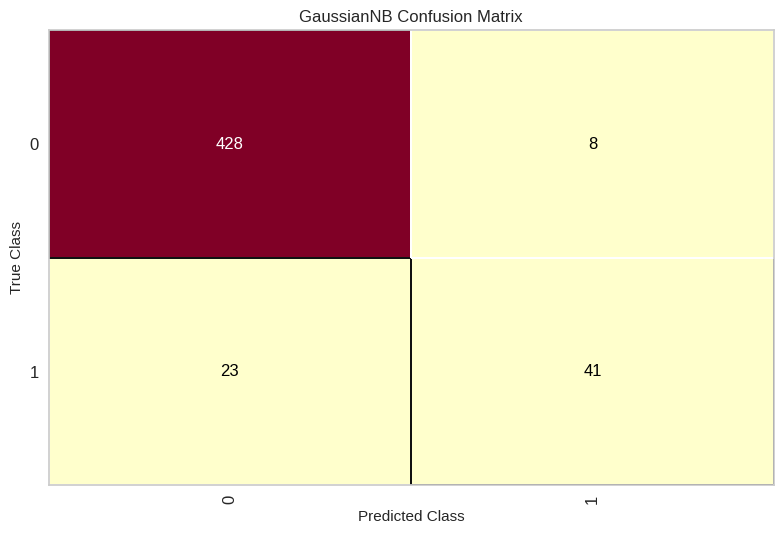

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
cm.show()

In [ ]:
print(classification_report(y_credit_teste, previsoes_credit_data))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [ ]:
# Usando bernolNb

naive_credit_data_b = BernoulliNB()
naive_credit_data_b.fit(X_credit_treinamento, y_credit_treinamento)


BernoulliNB()

In [ ]:
previsao_credit_data_b = naive_credit_data_b.predict(X_credit_teste)

In [ ]:
accuracy_b = accuracy_score(y_credit_teste, previsao_credit_data_b)
print(f"Accuracy: {accuracy_b}")

Accuracy: 0.872


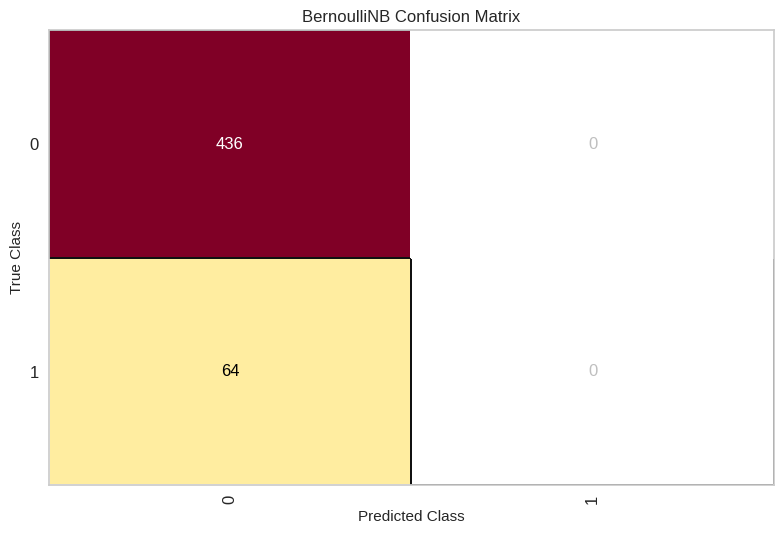

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(naive_credit_data_b)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
cm.show()

In [ ]:
print(classification_report(y_credit_teste, previsao_credit_data_b))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       436
           1       0.00      0.00      0.00        64

    accuracy                           0.87       500
   macro avg       0.44      0.50      0.47       500
weighted avg       0.76      0.87      0.81       500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Base - Census

with open(caminho + '/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
import pickle

with open(caminho + '/census.pkl', 'wb') as f:
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

print("Census data saved to census.pkl")

Census data saved to census.pkl


In [ ]:
from sklearn.model_selection import train_test_split

X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.20, random_state=0)

print("Shape of X_census_treinamento:", X_census_treinamento.shape)
print("Shape of X_census_teste:", X_census_teste.shape)
print("Shape of y_census_treinamento:", y_census_treinamento.shape)
print("Shape of y_census_teste:", y_census_teste.shape)

Shape of X_census_treinamento: (26048, 108)
Shape of X_census_teste: (6513, 108)
Shape of y_census_treinamento: (26048,)
Shape of y_census_teste: (6513,)


In [ ]:
X_census = census_db.drop('income', axis=1)
y_census = census_db['income']

X_census = pd.get_dummies(X_census)
display(X_census.head())

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
census_file_path = caminho + "/census.csv"
census_db = pd.read_csv(census_file_path)
display(census_db.head())
display(census_db.info())

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_census_data = GaussianNB()
naive_census_data.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [ ]:
accuracy = accuracy_score(y_census_teste, previsoes_census_data)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_census_teste, previsoes_census_data)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_census_teste, previsoes_census_data)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7936434822662367
Confusion Matrix:
[[4675  243]
 [1101  494]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      4918
        >50K       0.67      0.31      0.42      1595

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.79      0.76      6513



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


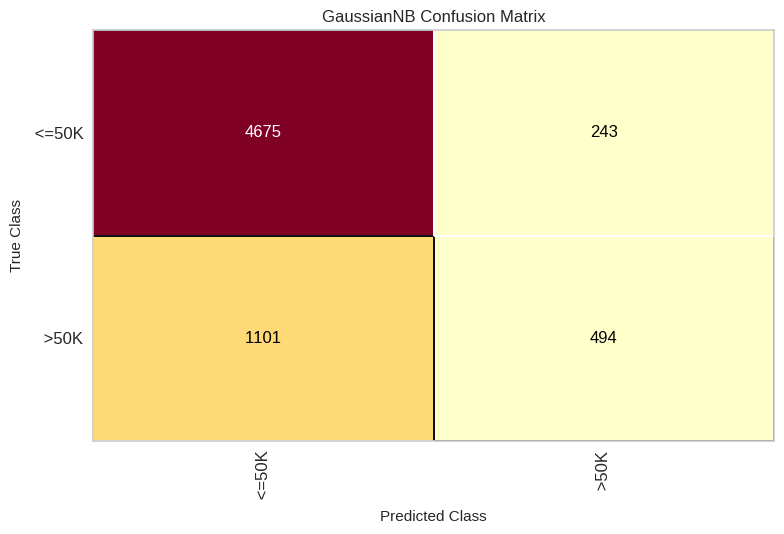

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_census_data)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
cm.show()

In [ ]:
#bernouliNB

naive_census_data_b = BernoulliNB()
naive_census_data_b.fit(X_census_treinamento, y_census_treinamento)

BernoulliNB()

In [ ]:
previsao_census_data_b = naive_census_data_b.predict(X_census_teste)

In [ ]:
accuracy_b = accuracy_score(y_census_teste, previsao_census_data_b)
print(f"Accuracy: {accuracy_b}")

Accuracy: 0.7521879318286504


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


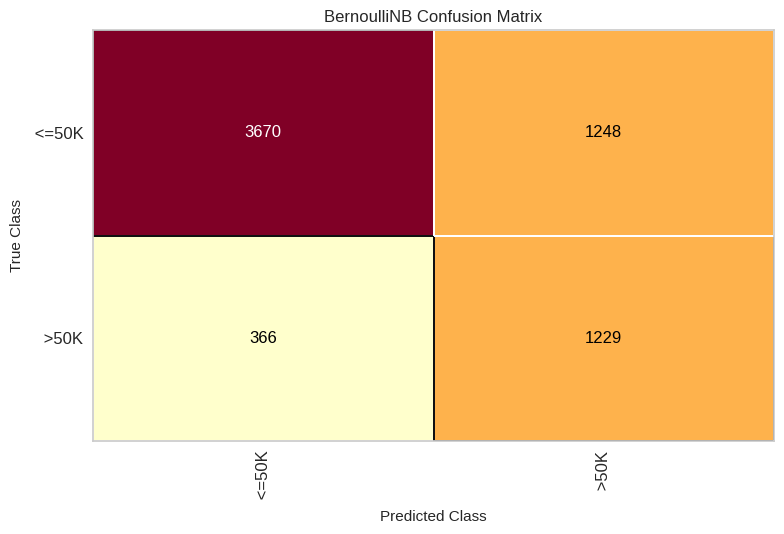

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(naive_census_data_b)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
cm.show()

In [ ]:
print(classification_report(y_census_teste, previsao_census_data_b))

              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.82      4918
        >50K       0.50      0.77      0.60      1595

    accuracy                           0.75      6513
   macro avg       0.70      0.76      0.71      6513
weighted avg       0.81      0.75      0.77      6513

